Run the cell below:

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as pdr

# Problem 1 
### (10 x 5 = 50 points)

In this problem, you will analyze how the correlation between future corporate investment and current operating cash flows differs between dividend payers and non-payers.

1. Load the Compustat data (the "compa.zip" file from the "data" folder) into a dataframe called ``rawcomp``. Print out the column names of ``rawcomp``.
2. Create a new dataframe called ``comp`` that contains the following variables from ``rawcomp``: 'permno','datadate','ppent' (net PP\&E),'oancf' (operating cash flows),'at' (total assets),'dvc' (cash dividend). Then get rid of all rows that have any missing values in any of these variables. Then keep only the rows where both total assets and net PP\&E are strictly larger than 0. Display the first two rows of ``comp``. All future instructions refer to the ``comp`` dataframe.
3. Create a new column in ``comp`` called ``year`` that extracts just the year from ``datadate``. Then sort ``comp`` by ``permno`` and ``datadate``. Then drop duplicates with respect to ``permno`` and ``year``, keeping only the last observation when a duplicate is found. Print the first two rows of this new version of ``comp``.
4. For each firm, each year, calculate the percentage change in ``ppent``. Call this new variable ``invest``. Then create a new variable called ``future_invest`` which gives us the value of ``invest`` from the following year, for each firm (assume there are no "gaps" in the data). Finally create a new variable called ``cflow`` which equals operating cash flows divided by total assets. Print a table that gives us the mean, median and standard deviation (only these 3 stats) for the ``invest``, ``future_invest``, and ``cflow`` variables.
5. Winsorize ``invest``, ``future_invest``, and ``cflow`` at the 1st and 99th percentiles. Call these winsorize variables ``w_invest``, ``w_future_invest``, and ``w_cflow`` respectively. Print a table that gives us the mean, median and standard deviation (only these 3 stats) for the ``w_invest``, ``w_future_invest``, and ``w_cflow`` variables. (Note how they differ from the non-winsorize statistics.)
6. Create a new variable called ``div_payer`` which equals 1 for observations (rows) where the cash divided is strictly larger than 0, and 0 otherwise. Print out how many times ``div_payer`` equals 1 and how many times it equals 0.
7. Every year, calculate the correlation between ``w_future_invest`` and ``w_cflow`` using only the observations from that year. Then plot this time-series of correlations over time.
8. Now do the same thing separately for divided payers vs non-payers: i.e. every year, you should have two correlations between ``w_future_invest`` and ``w_cflow``: one which uses the data for dividend payers that year, and one using the data for non-payers that year. Store these correlations in a dataframe called ``ann_corrs_div`` and print its first 4 rows.
9. Reshape the ``ann_corrs_div`` dataframe to a wide format, where the correlations for dividend payers show up in a separate column from the correlations for non-payers. Call this wide dataframe ``ann_corrs_wide`` and print its first 2 rows.
10. Plot the time-series of correlations for dividend payers and the one for non-payers as two lines in the same plot.

In [2]:
# 1
print("Output for part 1:")
rawcomp = pd.read_pickle('../../lectures/data/compa.zip')
rawcomp.columns

Output for part 1:


Index(['permno', 'datadate', 'gvkey', 'tic', 'conm', 'at', 'capx', 'che',
       'cogs', 'csho', 'dlc', 'dltt', 'dp', 'dvc', 'ib', 'oancf', 'ppegt',
       'ppent', 'revt', 'sale', 'fic', 'prcc_f', 'sich'],
      dtype='object')

In [3]:
# 2
print("Output for part 2:")
comp = rawcomp[['permno','datadate','ppent','oancf','at','dvc']].copy().dropna()
comp = comp.loc[(comp['at']>0) & (comp['ppent'] > 0) , :].copy()
comp.head(2)

Output for part 2:


,permno,datadate,ppent,oancf,at,dvc
15,10031.0,1988-01-31,1.179,-0.987,16.042,0.0
16,10031.0,1989-01-31,1.076,-2.100,16.280,0.0


In [4]:
# 3
print("Output for part 3:")
comp['year'] = pd.to_datetime(comp['datadate']).dt.year
comp = comp.sort_values(['permno','datadate'])
comp = comp.drop_duplicates(['permno','year'], keep = 'last')
comp.head(2)

Output for part 3:


,permno,datadate,ppent,oancf,at,dvc,year
188568,10001.0,1989-06-30,14.160,1.772,18.565,0.459,1989
188569,10001.0,1990-06-30,14.426,1.894,18.881,0.523,1990


In [5]:
# 4
print("Output for part 4:")
comp['invest'] = comp.groupby('permno')['ppent'].pct_change()
comp['future_invest'] = comp.groupby('permno')['invest'].shift(-1)
comp['cflows'] = comp['oancf'] / comp['at']
comp[['invest','future_invest','cflows']].agg(['mean','median','std'])

Output for part 4:


,invest,future_invest,cflows
mean,2.196809,2.196809,0.003587
median,0.039628,0.039628,0.056624
std,234.900724,234.900724,0.387163


In [6]:
# 5
print("Output for part 5:")
for v in ['invest','future_invest','cflows']:
    comp[f'w_{v}'] = comp[v].clip(lower=comp[v].quantile(0.01), upper=comp[v].quantile(0.99))

comp[['w_invest','w_future_invest','w_cflows']].agg(['mean','median','std'])

Output for part 5:


,w_invest,w_future_invest,w_cflows
mean,0.213253,0.213253,0.011639
median,0.039628,0.039628,0.056624
std,0.756891,0.756891,0.213245


In [7]:
# 6
print("Output for part 6:")
comp['div_payer'] = np.where(comp['dvc']>0, 1, 0)
comp['div_payer'].value_counts()

Output for part 6:


0    111315
1     61740
Name: div_payer, dtype: int64

Output for part 7:


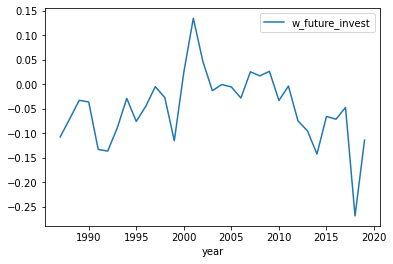

In [8]:
# 7
print("Output for part 7:")
annual_corrs = comp.groupby('year')['w_future_invest'].corr(comp['w_cflows']).to_frame()
annual_corrs.plot();

In [9]:
# 8
print("Output for part 8:")
ann_corrs_div = comp.groupby(['year','div_payer'])['w_future_invest'].corr(comp['w_cflows']).to_frame()
ann_corrs_div.head(4)

Output for part 8:


w_future_invest
year div_payer                 
1987 0                -0.072499
     1                 0.027246
1988 0                -0.067667
     1                 0.051877

In [10]:
# 9
print("Output for part 9:")
ann_corrs_wide = ann_corrs_div.reset_index().pivot(index='year',columns='div_payer')
ann_corrs_wide.head(2)

Output for part 9:


w_future_invest          
div_payer               0         1
year                               
1987            -0.072499  0.027246
1988            -0.067667  0.051877

Output for part 10:


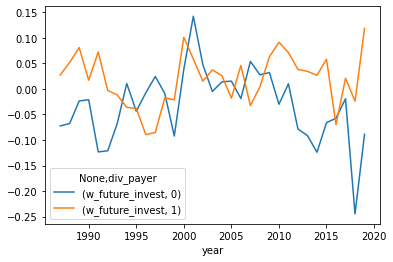

In [11]:
# 10
print("Output for part 10:")
ann_corrs_wide.plot();

# Problem 2
### (10 x 5 = 50 points)

In this problem, you will calculate value-weighted industry returns using all publicly traded firms from 1980 to 2020.

1. Load the monthly CRSP data (the ``crspm.zip`` file from the ``data`` folder) into a new dataframe called ``rawcrsp``. Print the names of the columns of ``rawcrsp``.
2. Create a new variable in ``rawcrsp`` called ``mktcap`` (market capitalization) which equals the absolute value of price (``prc``) times the number of shares (``shrout``). Display the first 2 rows of ``rawcrsp``.
3. Create a new dataframe called ``crsp`` which contains the following variables from ``rawcrsp``: 'permno','date','ret','mktcap', 'siccd'. Then drop all rows in ``crsp`` which contain any missing values in any of its columns. Display the first 2 rows of ``crsp``.
4. Create a new column in ``crsp`` called ``mdate`` which equals the ``date`` variable converted to a monthly "period" type. Print a table which contains only the minimum and maximum values of ``mdate``.
5. Create a new column in ``crsp`` called ``sector`` which equals the first digit of the SIC code (``siccd``). Print a table which shows how many observations we have for each value of ``sector``.
6. Create a new column in ``crsp`` called ``weights`` which, for every firm, every month, gives us the market capitalization of that firm divided by the sum of the market capitalizations of all firms that are in the same sector as that firm that month (think of the weights in a portfolio, where the portfolio is the sector that the firm operates in that month). Use ``.describe()`` to print out the summary statistics of the ``weights`` variable.
7. Create a new variable in ``crsp`` called ``vwret`` which equals the firm's return times its industry weight (given by ``weights``). Then, each month, for each sector, add up these ``vwret`` values of the firms in that sector, that month. This will give you the value-weighted return of each sector, each month. Store these returns in a new dataframe called ``ind_vwret``. Display the first 20 rows of ``ind_vwret``.
8. Create a new dataframe called ``ind_vwret_wide`` which is a reshaped version of ``ind_vwret``, where the returns of each sector show up in a separate column. Display the first two rows of ``ind_vwret_wide``.
9. Plot the returns for sectors 3 (manufacturing) and 6 (finance), in two subplots of the same plot. 
10. For sectors 3 and 6, compound their returns over time, and plot these two time-series of compounded returns in the same plot.

In [12]:
# 1
print("Output for part 1:")
rawcrsp = pd.read_pickle('../../lectures/data/crspm.zip')
rawcrsp.columns

Output for part 1:


Index(['permno', 'permco', 'date', 'prc', 'ret', 'shrout', 'shrcd', 'exchcd',
       'siccd', 'ticker'],
      dtype='object')

In [13]:
# 2
print("Output for part 2:")
rawcrsp['mktcap'] = rawcrsp['prc'].abs() * rawcrsp['shrout']
rawcrsp.head(2)

Output for part 2:


,permno,permco,date,prc,ret,shrout,shrcd,exchcd,siccd,ticker,mktcap
0,10000.0,7952.0,1986-01-31,-4.375,NaN,3680.0,10.0,3.0,3990.0,OMFGA,16100.0
1,10000.0,7952.0,1986-02-28,-3.250,-0.257143,3680.0,10.0,3.0,3990.0,OMFGA,11960.0


In [14]:
# 3
print("Output for part 3:")
crsp = rawcrsp[['permno','date','ret','mktcap', 'siccd']].copy().dropna()
crsp.head(2)

Output for part 3:


,permno,date,ret,mktcap,siccd
1,10000.0,1986-02-28,-0.257143,11960.0,3990.0
2,10000.0,1986-03-31,0.365385,16330.0,3990.0


In [15]:
# 4
print("Output for part 4:")
crsp['mdate'] = pd.to_datetime(crsp['date']).dt.to_period('M')
crsp['mdate'].agg(['min','max'])

Output for part 4:


min    1980-01
max    2020-12
Name: mdate, dtype: period[M]

In [16]:
# 5
print("Output for part 5:")
crsp['sector'] = crsp['siccd'].astype('string').str[0]
crsp['sector'].value_counts()

Output for part 5:


3    643974
6    482560
2    327363
7    271156
5    250972
4    193575
1    151512
8    113159
9     64948
0     31446
Name: sector, dtype: Int64

In [17]:
# 6
print("Output for part 6:")
crsp['weights'] = crsp.groupby(['mdate','sector'])['mktcap'].transform(lambda x: x / x.sum())
crsp['weights'].describe()

Output for part 6:


count    2.530665e+06
mean     1.850502e-03
std      1.242670e-02
min      0.000000e+00
25%      3.375191e-05
50%      1.468634e-04
75%      7.255903e-04
max      1.000000e+00
Name: weights, dtype: float64

In [18]:
# 7
print("Output for part 7:")
crsp['vwret'] = crsp['ret'] * crsp['weights']
ind_vwret = crsp.groupby(['mdate','sector'])['vwret'].sum().to_frame()
ind_vwret.head(20)

Output for part 7:


vwret
mdate   sector          
1980-01 0       0.101065
        1       0.156651
        2       0.080099
        3       0.096289
        4       0.017436
        5       0.019792
        6       0.031370
        7       0.061095
        8       0.107431
        9       2.800000
1980-02 0       0.015623
        1       0.093863
        2       0.059218
        3      -0.036097
        4      -0.025601
        5      -0.041283
        6      -0.038605
        7      -0.032889
        8      -0.033714
        9       1.105263

In [19]:
# 8
print("Output for part 8:")
ind_vwret_wide = ind_vwret.reset_index().pivot(index = 'mdate', columns = 'sector')
ind_vwret_wide.head(2)

Output for part 8:


vwret                                                              \
sector          0         1         2         3         4         5         6   
mdate                                                                           
1980-01  0.101065  0.156651  0.080099  0.096289  0.017436  0.019792  0.031370   
1980-02  0.015623  0.093863  0.059218 -0.036097 -0.025601 -0.041283 -0.038605   

                                       
sector          7         8         9  
mdate                                  
1980-01  0.061095  0.107431  2.800000  
1980-02 -0.032889 -0.033714  1.105263

Output for part 9:


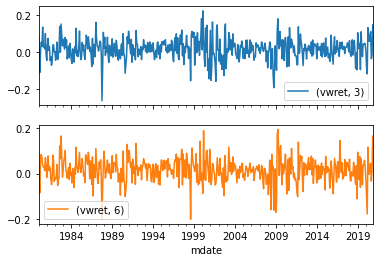

In [20]:
# 9
print("Output for part 9:")
ind_vwret_wide[[('vwret','3'),('vwret','6')]].plot(subplots = True);

Output for part 10:


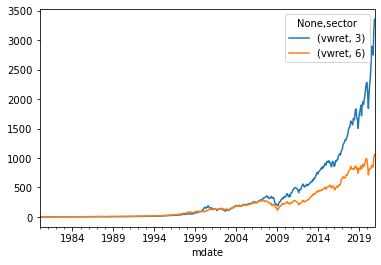

In [21]:
# 10
print("Output for part 10:")
(1+ind_vwret_wide[[('vwret','3'),('vwret','6')]]).cumprod().plot();